In [297]:
%matplotlib inline


Neural Networks
===============

Neural networks can be constructed using the ``torch.nn`` package.

Now that you had a glimpse of ``autograd``, ``nn`` depends on
``autograd`` to define models and differentiate them.
An ``nn.Module`` contains layers, and a method ``forward(input)``\ that
returns the ``output``.

For example, look at this network that classifies digit images:

.. figure:: /_static/img/mnist.png
   :alt: convnet

   convnet

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

Define the network
------------------

Let’s define this network:



first create a function to check grad_gn

In [298]:
# print all attributes
def DCG_node(listValue):
    for (i, v) in enumerate(listValue):
        print(f"{i}.data: {v.data}\n{i}.requires_grad: {v.requires_grad}\n{i}.grad: {v.grad}\n{i}.grad_fn: {v.grad_fn}\n{i}.is_leaf: {v.is_leaf}\n")

In [299]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Conv layer
-----------------------
we create a image = $N$, $T$, $x$, $y$ represents batch size, input_channel, img_height, img_width  
This time we generate a simple one, just two of 6 * 6 grey image whose input channel is one

In [300]:
img = torch.FloatTensor([[[[1, 1, 1, 1, 1, 1],
                           [0, 0, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1, 1],
                           [0, 0, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1, 1],
                           [0, 0, 0, 0, 0, 0]]], 
                         
                         [[[0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1]]]])
img.size()

torch.Size([2, 1, 6, 6])

put it in the convolutional layer first, at this time kernel just generate randomly since we need to try them

In [301]:
conv = nn.Conv2d(1, 1, 3) # the input channel should be consistent with the image
conv_img = conv(img)
conv_img

tensor([[[[ 0.0833,  0.0833,  0.0833,  0.0833],
          [-0.3452, -0.3452, -0.3452, -0.3452],
          [ 0.0833,  0.0833,  0.0833,  0.0833],
          [-0.3452, -0.3452, -0.3452, -0.3452]]],


        [[[-0.3231,  0.0613, -0.3231,  0.0613],
          [-0.3231,  0.0613, -0.3231,  0.0613],
          [-0.3231,  0.0613, -0.3231,  0.0613],
          [-0.3231,  0.0613, -0.3231,  0.0613]]]],
       grad_fn=<MkldnnConvolutionBackward>)

check the paramaters of this conv layer

In [302]:
params = list(conv.parameters())
params

[Parameter containing:
 tensor([[[[ 0.2271, -0.3146,  0.0839],
           [-0.0099,  0.1391, -0.2681],
           [ 0.0806,  0.0588,  0.1541]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.2064], requires_grad=True)]

they kernel layer(weights) cover on the image to calculate (multiple and then summary) one scalar and then add bias, so all layers in one kernel cube add the same scalar. The number of bias is the same as the number of kernel cube.

ReLU
--------------------------------
ReLU it convert negative to 0

In [303]:
relu_img = F.relu(conv_img)
relu_img

tensor([[[[0.0833, 0.0833, 0.0833, 0.0833],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0833, 0.0833, 0.0833, 0.0833],
          [0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0613, 0.0000, 0.0613],
          [0.0000, 0.0613, 0.0000, 0.0613],
          [0.0000, 0.0613, 0.0000, 0.0613],
          [0.0000, 0.0613, 0.0000, 0.0613]]]], grad_fn=<ReluBackward0>)

max_pooling
-------------------------
max_pooling it

In [304]:
mxp_img = F.max_pool2d(relu_img, (2, 2))
print(mxp_img)
mxp_img.size() # batch size, input channel, img_height and width

tensor([[[[0.0833, 0.0833],
          [0.0833, 0.0833]]],


        [[[0.0613, 0.0613],
          [0.0613, 0.0613]]]], grad_fn=<MaxPool2DWithIndicesBackward>)


torch.Size([2, 1, 2, 2])

In [305]:
size = mxp_img.size()[1:]  # all dimensions except the batch dimension
num_features = 1
for s in size:
    num_features *= s
print(num_features) # 1 * 4 * 4 = 16

4


linear layer
-------------------------
before put it into the linear layer, we need to view this mxp_img

In [306]:
mxp_img = mxp_img.view(-1, 4)
mxp_img

tensor([[0.0833, 0.0833, 0.0833, 0.0833],
        [0.0613, 0.0613, 0.0613, 0.0613]], grad_fn=<ViewBackward>)

add one linear layer

In [307]:
fc = nn.Linear(4, 10) # input is 16 and output is 30
fc_img = fc(mxp_img)

check the parameter

In [308]:
params = list(fc.parameters())
params

[Parameter containing:
 tensor([[ 0.4128,  0.1145,  0.1438, -0.2556],
         [ 0.2738, -0.4322, -0.1094,  0.0399],
         [-0.0106,  0.0363,  0.4346,  0.0666],
         [-0.2106,  0.4530,  0.3084, -0.4326],
         [ 0.0487,  0.4026,  0.1910, -0.4147],
         [-0.1871, -0.1105, -0.0858, -0.2622],
         [-0.4255, -0.0371,  0.0879, -0.3040],
         [ 0.4788,  0.0145, -0.2304,  0.0193],
         [-0.1396, -0.4738, -0.1093, -0.1515],
         [-0.2864,  0.0234,  0.1643,  0.0302]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0149, -0.3057, -0.3153,  0.4991, -0.1166,  0.4917,  0.2808, -0.1515,
          0.0411,  0.3974], requires_grad=True)]

check the image

In [309]:
fc_img

tensor([[ 0.0495, -0.3247, -0.2714,  0.5090, -0.0976,  0.4379,  0.2242, -0.1280,
         -0.0317,  0.3917],
        [ 0.0404, -0.3197, -0.2830,  0.5064, -0.1026,  0.4521,  0.2392, -0.1342,
         -0.0124,  0.3932]], grad_fn=<AddmmBackward>)

Here, we have finished the forward propagation, here is the predict value.  
so you can see, the process is that
```
original image (batch size: *, in_channel: IN, height: *, width: *)-> conv layer (in_channel: IN, out_channel: OUT, kernel_size: S) -> ReLU layer -> max pooling -> linear layer
```
not matter what size of image you would like to use, but just the input channel of the image will be affected  
**So the model just care about the input channel of these images.**

loss function and back propagation
---------------------------
we need the real value to calculate the loss

In [310]:
real = torch.randn(2, 10)  # a dummy target, for example
real = real.view(2, -1)  # make it the same shape as output
real

tensor([[-0.4211,  0.6657, -0.3038,  0.5373, -1.1408, -0.2352,  1.3481,  0.6563,
         -1.7235,  0.3519],
        [ 0.2362,  0.7395,  0.5848, -0.4756, -0.2304, -0.9431,  0.1035,  0.1380,
         -0.7830, -0.2065]])

we choose MSE as our loss function and calculate back propagation.  
before that we need to empty grad after the loss function.  
it is ok to calculate 2 images altogether.

In [311]:
criterion = nn.MSELoss()
lr = 0.01

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

let's do the first forward propagation

In [337]:
img = torch.FloatTensor([[[[1, 1, 1, 1, 1, 1],
                           [0, 0, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1, 1],
                           [0, 0, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1, 1],
                           [0, 0, 0, 0, 0, 0]]], 
                         
                         [[[0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0, 1]]]])
conv = nn.Conv2d(1, 1, 3) # the input channel should be consistent with the image
conv_img = conv(img)
relu_img = F.relu(conv_img)
mxp_img = F.max_pool2d(relu_img, (2, 2))
mxp_img = mxp_img.view(-1, 4)
fc = nn.Linear(4, 10) # input is 16 and output is 30
fc_img = fc(mxp_img)

Text(0.5, 1.0, 'mse 0.10826347768306732')

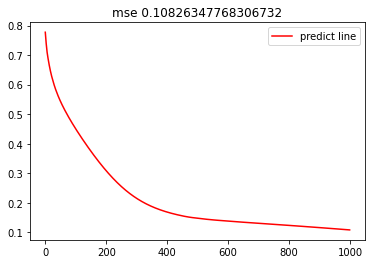

In [338]:
epoch_max = 1000
epoch = 0
epochs = []
lossl = []
fig, ax = plt.subplots()
while epoch < epoch_max:
    loss = criterion(fc_img, real)
    conv.zero_grad()
    fc.zero_grad()
    loss.backward()
    ## update weights and bias
    conv.weight.data = (conv.weight.data - lr * conv.weight.grad)
    conv.bias.data = (conv.bias.data - lr * conv.bias.grad)
    fc.weight.data = (fc.weight.data - lr * fc.weight.grad)
    fc.bias.data = (fc.bias.data - lr * fc.bias.grad)
    ## do forward propagation
    conv_img = conv(img)
    relu_img = F.relu(conv_img)
    mxp_img = F.max_pool2d(relu_img, (2, 2))
    mxp_img = mxp_img.view(-1, 4)
    fc_img = fc(mxp_img)
    lossl.append(loss.item())
    epochs.append(epoch)
    epoch = epoch + 1
sns.lineplot(x=epochs, y=lossl, color='red', label='predict line', ax=ax)
plt.title(f"mse {loss}")

check all weights and bias nodes
-------------------------
we need to check conv layer, ReLU layer, max_pooling layer and linear layer

In [286]:
DCG_node([conv.weight, conv.bias, fc.weight, fc.bias])

0.data: tensor([[[[ 0.0887, -0.2101,  0.0346],
          [ 0.0903, -0.0268, -0.3269],
          [ 0.1433, -0.0897, -0.1354]]]])
0.requires_grad: True
0.grad: tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])
0.grad_fn: None
0.is_leaf: True

1.data: tensor([0.0997])
1.requires_grad: True
1.grad: tensor([0.])
1.grad_fn: None
1.is_leaf: True

2.data: tensor([[ 0.4471, -0.0048, -0.3660,  0.3647],
        [ 0.3644, -0.0986, -0.3789, -0.4644],
        [ 0.4468, -0.0409,  0.4230,  0.2394],
        [ 0.0188, -0.2272,  0.3709, -0.3431],
        [-0.3230,  0.2902,  0.0353,  0.4968],
        [-0.0480,  0.0465,  0.3404, -0.2450],
        [ 0.0084,  0.1707, -0.0743, -0.1663],
        [-0.0398,  0.2396, -0.0323, -0.2799],
        [-0.4405,  0.3537,  0.4507,  0.4211],
        [-0.0785, -0.1691, -0.2721,  0.2332]])
2.requires_grad: True
2.grad: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
    

these are values that you need to update

Use nn.Module class
=======================

neural network architecture
----------------------------------

In [339]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels means 6 kernel cube
        # with 1 layer 3x3 square 
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``



In [ ]:
params = list(net.parameters())
print(len(params))
for p in params:
    print(p.size())
    print(' ')

# kernel cube weigths: number of kernel cube, layer of each kernel cube, shape of kernel layer is 3 * 3
# torch.Size([6, 1, 3, 3])
 
# kernel cube bias: for each kernel cube
# torch.Size([6])
 
# torch.Size([16, 6, 3, 3])
 
# torch.Size([16])
 
# torch.Size([120, 576])
 
# torch.Size([120])
 
# torch.Size([84, 120])
 
# torch.Size([84])
 
# torch.Size([10, 84])
 
# torch.Size([10])

10
torch.Size([6, 1, 3, 3])
 
torch.Size([6])
 
torch.Size([16, 6, 3, 3])
 
torch.Size([16])
 
torch.Size([120, 576])
 
torch.Size([120])
 
torch.Size([84, 120])
 
torch.Size([84])
 
torch.Size([10, 84])
 
torch.Size([10])
 


Let's try a random 32x32 input.
Note: expected input size of this net (LeNet) is 32x32. To use this net on
the MNIST dataset, please resize the images from the dataset to 32x32.



In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1104,  0.0295,  0.1502,  0.0137,  0.0178, -0.1712, -0.1503,  0.1474,
         -0.0911,  0.0572]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random
gradients:



In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

<div class="alert alert-info"><h4>Note</h4><p>``torch.nn`` only supports mini-batches. The entire ``torch.nn``
    package only supports inputs that are a mini-batch of samples, and not
    a single sample.

    For example, ``nn.Conv2d`` will take in a 4D Tensor of
    ``nSamples x nChannels x Height x Width``.

    If you have a single sample, just use ``input.unsqueeze(0)`` to add
    a fake batch dimension.</p></div>

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network

Loss Function
-------------
A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
`loss functions <https://pytorch.org/docs/nn.html#loss-functions>`_ under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the input and the target.

For example:



In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7284, grad_fn=<MseLossBackward>)


Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the loss, and all Tensors in the graph that has ``requires_grad=True``
will have their ``.grad`` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:



In [ ]:
printatt(loss)

data: 0.7283908724784851
requires_grad: True
grad: None
grad_fn: <MseLossBackward object at 0x7f114db98b38>
is_leaf: False



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

Backprop
--------
To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.



In [ ]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0082,  0.0018,  0.0057, -0.0208, -0.0037, -0.0040])


pay attetion, only leaf node could get grad values, so let's check if they are all leaf

In [ ]:
print_isleaf(net.conv1.weight)
print_isleaf(net.conv1.bias)
print_isleaf(net.conv2.weight)
print_isleaf(net.conv2.bias)
print_isleaf(net.fc1.weight)
print_isleaf(net.fc1.bias)
print_isleaf(net.fc2.weight)
print_isleaf(net.fc2.bias)
print_isleaf(net.fc3.weight)
print_isleaf(net.fc3.bias)

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True

is_leaf: True



Now, we have seen how to use loss functions.

**Read Later:**

  The neural network package contains various modules and loss functions
  that form the building blocks of deep neural networks. A full list with
  documentation is `here <https://pytorch.org/docs/nn>`_.

**The only thing left to learn is:**

  - Updating the weights of the network

Update the weights
------------------
The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

     ``weight = weight - learning_rate * gradient``

We can implement this using simple Python code:

.. code:: python

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, we built a small package: ``torch.optim`` that
implements all these methods. Using it is very simple:



In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

.. Note::

      Observe how gradient buffers had to be manually set to zero using
      ``optimizer.zero_grad()``. This is because gradients are accumulated
      as explained in the `Backprop`_ section.

